In [ ]:
#analisis de sentimientos en reclamaciones:
# datasets download: https://files.consumerfinance.gov/ccdb/complaints.csv.zip

In [26]:
#exploración de datos:
import pandas as pd
df = pd.read_csv('/Users/emontoya/Downloads/complaints.csv')
df = df[pd.notnull(df['Consumer complaint narrative'])]
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2019-09-24,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,transworld systems inc. \nis trying to collect...,NaN,TRANSWORLD SYSTEMS INC,FL,335XX,NaN,Consent provided,Web,2019-09-24,Closed with explanation,Yes,NaN,3384392
2,2019-10-25,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,I would like to request the suppression of the...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",CA,937XX,NaN,Consent provided,Web,2019-10-25,Closed with explanation,Yes,NaN,3417821
3,2019-11-08,Debt collection,I do not know,Communication tactics,Frequent or repeated calls,"Over the past 2 weeks, I have been receiving e...",NaN,"Diversified Consultants, Inc.",NC,275XX,NaN,Consent provided,Web,2019-11-08,Closed with explanation,Yes,NaN,3433198
11,2019-09-08,"Money transfer, virtual currency, or money ser...",Domestic (US) money transfer,Fraud or scam,NaN,"I was sold access to an event digitally, of wh...",NaN,"Paypal Holdings, Inc",RI,029XX,NaN,Consent provided,Web,2019-09-08,Closed with explanation,Yes,NaN,3366475
12,2019-09-24,Debt collection,Medical debt,Attempts to collect debt not owed,Debt is not yours,While checking my credit report I noticed thre...,Company has responded to the consumer and the ...,"HCFS Health Care Financial Services, Inc.",FL,333XX,NaN,Consent provided,Web,2019-09-24,Closed with explanation,Yes,NaN,3385399


In [2]:
df.count()

Date received                   524600
Product                         524600
Sub-product                     472428
Issue                           524600
Sub-issue                       392239
Consumer complaint narrative    524600
Company public response         256574
Company                         524600
State                           522595
ZIP code                        406951
Tags                             90016
Consumer consent provided?      524600
Submitted via                   524600
Date sent to company            524600
Company response to consumer    524599
Timely response?                524600
Consumer disputed?              164066
Complaint ID                    524600
dtype: int64

In [27]:
from io import StringIO
col = ['Product', 'Consumer complaint narrative']
df = df[col]
df = df[pd.notnull(df['Consumer complaint narrative'])]
df.columns = ['Product', 'Consumer_complaint_narrative']
df['category_id'] = df['Product'].factorize()[0]
category_id_df = df[['Product', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)
df.head()

,Product,Consumer_complaint_narrative,category_id
0,Debt collection,transworld systems inc. \nis trying to collect...,0
2,"Credit reporting, credit repair services, or o...",I would like to request the suppression of the...,1
3,Debt collection,"Over the past 2 weeks, I have been receiving e...",0
11,"Money transfer, virtual currency, or money ser...","I was sold access to an event digitally, of wh...",2
12,Debt collection,While checking my credit report I noticed thre...,0


In [28]:
df = df.head(50)

In [29]:
df

,Product,Consumer_complaint_narrative,category_id
0,Debt collection,transworld systems inc. \nis trying to collect...,0
2,"Credit reporting, credit repair services, or o...",I would like to request the suppression of the...,1
3,Debt collection,"Over the past 2 weeks, I have been receiving e...",0
11,"Money transfer, virtual currency, or money ser...","I was sold access to an event digitally, of wh...",2
12,Debt collection,While checking my credit report I noticed thre...,0
14,"Credit reporting, credit repair services, or o...",Today XX/XX/XXXX went online to dispute the in...,1
16,"Credit reporting, credit repair services, or o...",XXXX is reporting incorrectly to Equifax and X...,1
17,"Credit reporting, credit repair services, or o...",Please reverse the late payments reported on t...,1
18,"Credit reporting, credit repair services, or o...",I would like the credit bureau to correct my X...,1
19,"Credit reporting, credit repair services, or o...",MY NAME IS XXXX XXXX XXXX I live at XXXX XXXX ...,1


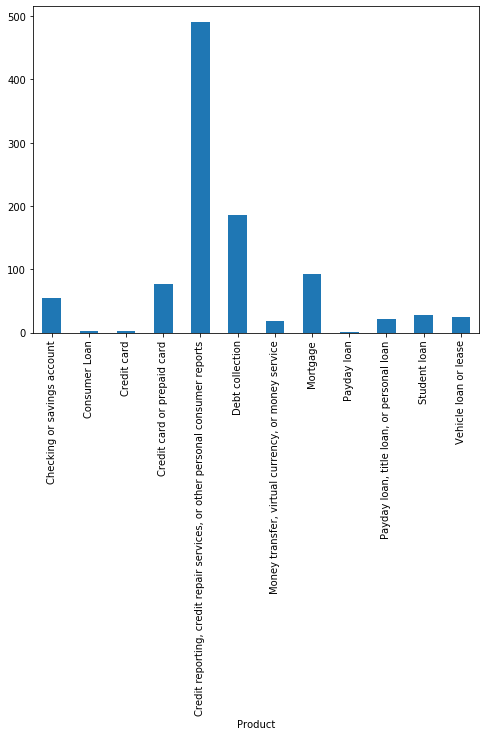

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Product').Consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

In [30]:
df.groupby('Product').Consumer_complaint_narrative.count()

Product
Credit card or prepaid card                                                      1
Credit reporting, credit repair services, or other personal consumer reports    39
Debt collection                                                                  4
Money transfer, virtual currency, or money service                               1
Mortgage                                                                         3
Student loan                                                                     2
Name: Consumer_complaint_narrative, dtype: int64

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.Consumer_complaint_narrative).toarray()
labels = df.category_id
features.shape

(50, 111)

In [32]:
features

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.30249723, 0.        ,
        0.30826687],
       ...,
       [0.        , 0.        , 0.        , ..., 0.24048848, 0.        ,
        0.23078598],
       [0.0913037 , 0.22269461, 0.        , ..., 0.22048251, 0.20276904,
        0.20374678],
       [0.        , 0.        , 0.        , ..., 0.42892209, 0.        ,
        0.46223841]])

In [ ]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Product))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

In [33]:
# Naive Bayes Classifier: the one most suitable for word counts is the multinomial variant:
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.naive_bayes import MultinomialNB

count_vect = CountVectorizer()

X_train, X_test, y_train, y_test = train_test_split(df['Consumer_complaint_narrative'], df['Product'], random_state = 0)

In [36]:
X_train.count()

37

In [35]:
X_test

52    2ND NOTICE OF PENDING LITIGATION SEEKING RELIE...
22    We have already tried to contact the company w...
20    ALL THREE CREDIT BUREAUS ARE STILL PUTTING FRA...
76    In XX/XX/XXXX I began my XXXX studies with the...
3     Over the past 2 weeks, I have been receiving e...
51    The credit bureaus are reporting inaccurate/ou...
68    XXXX # XXXX is reporting lates on mine and my ...
57    XXXX XXXX refuses to accurately calculate the ...
36    XXXX and Transunion are incorrectly reporting ...
12    While checking my credit report I noticed thre...
60    I have written the following companies and I h...
63    XX/XX/XXXX XXXX XXXX XXXX XXXX XXXX XXXX # XXX...
50    I have a few situations going on with my credi...
Name: Consumer_complaint_narrative, dtype: object

In [38]:
y_train.count()

37

In [37]:
y_test.count()

13

In [39]:
#Term Frecuency - TF
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

In [40]:
print(X_train_counts)

  (0, 1066)	1
  (0, 575)	1
  (0, 971)	1
  (0, 857)	1
  (0, 542)	1
  (0, 502)	1
  (0, 887)	1
  (0, 673)	1
  (0, 945)	1
  (0, 678)	1
  (0, 470)	1
  (0, 529)	1
  (0, 270)	1
  (0, 156)	1
  (0, 805)	1
  (0, 450)	1
  (0, 637)	1
  (0, 277)	1
  (0, 808)	1
  (1, 1066)	1
  (1, 673)	4
  (1, 945)	28
  (1, 270)	1
  (1, 156)	1
  (1, 450)	6
  :	:
  (36, 523)	2
  (36, 909)	1
  (36, 191)	1
  (36, 157)	1
  (36, 986)	1
  (36, 1058)	1
  (36, 696)	1
  (36, 900)	1
  (36, 173)	1
  (36, 569)	1
  (36, 150)	1
  (36, 885)	1
  (36, 1072)	1
  (36, 106)	1
  (36, 875)	2
  (36, 863)	1
  (36, 936)	1
  (36, 113)	1
  (36, 175)	1
  (36, 925)	1
  (36, 1077)	1
  (36, 646)	1
  (36, 1011)	1
  (36, 428)	1
  (36, 89)	1


In [41]:
tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [42]:
print(X_train_tfidf)

  (0, 1066)	0.21302274006358143
  (0, 971)	0.2966161761350484
  (0, 945)	0.10137739677838366
  (0, 887)	0.2966161761350484
  (0, 857)	0.23338018289549955
  (0, 808)	0.1701441896559507
  (0, 805)	0.19638949815450693
  (0, 678)	0.2966161761350484
  (0, 673)	0.1331535049149581
  (0, 637)	0.1258511883748691
  (0, 575)	0.2596254913940558
  (0, 542)	0.1453356077613558
  (0, 529)	0.2966161761350484
  (0, 502)	0.2966161761350484
  (0, 470)	0.32286148463360465
  (0, 450)	0.14978674682403262
  (0, 277)	0.12942930399211455
  (0, 270)	0.2966161761350484
  (0, 156)	0.1701441896559507
  (1, 1070)	0.3704409922368309
  (1, 1069)	0.40149177039581363
  (1, 1066)	0.02177480920476902
  (1, 1064)	0.036783454797902494
  (1, 1061)	0.05591121723999852
  (1, 1049)	0.06600466434115786
  :	:
  (36, 546)	0.22836672117931583
  (36, 523)	0.11813469322039107
  (36, 473)	0.0844584328850871
  (36, 428)	0.12074796705593296
  (36, 342)	0.0783104425485303
  (36, 304)	0.19905840960446328
  (36, 277)	0.13028954663527523
  

In [44]:
y_train.count()

37

In [45]:
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [46]:
print(clf)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


In [47]:
print(clf.predict(count_vect.transform(["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."])))

['Credit reporting, credit repair services, or other personal consumer reports']


In [ ]:
# Naive Bayes Classifier: the one most suitable for word counts is the multinomial variant:
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['Consumer_complaint_narrative'], df['Product'], random_state = 0)

count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

clf.save("file.model")


In [ ]:
#After fitting the training set, let’s make some predictions.
print(clf.predict(count_vect.transform(["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."])))

In [ ]:
print(clf.predict(count_vect.transform(["I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all \n the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"])))

In [ ]:
# evaluar con el conjunto de testing

x_test
y_test

for each x_test:
    salida[] = clf.predict(count_vect.transfor(x_test[]))

evaluación????

    comparar (salida, y_test), precicin, recall, f1-score????, 80% ?????

In [ ]:
# probar otros modelos: SVM, random forest, KNN, etc, etc.

evaluacion entre modelos????

